In [1]:
import os
import cv2
import numpy as np
import onnxruntime as ort

In [2]:
class Colors:
    """
    Ultralytics color palette https://docs.ultralytics.com/reference/utils/plotting/#ultralytics.utils.plotting.Colors.

    This class provides methods to work with the Ultralytics color palette, including converting hex color codes to
    RGB values.

    Attributes:
        palette (list of tuple): List of RGB color values.
        n (int): The number of colors in the palette.
        pose_palette (np.ndarray): A specific color palette array with dtype np.uint8.

    ## Ultralytics Color Palette

    | Index | Color                                                             | HEX       | RGB               |
    |-------|-------------------------------------------------------------------|-----------|-------------------|
    | 0     | <i class="fa-solid fa-square fa-2xl" style="color: #042aff;"></i> | `#042aff` | (4, 42, 255)      |
    | 1     | <i class="fa-solid fa-square fa-2xl" style="color: #0bdbeb;"></i> | `#0bdbeb` | (11, 219, 235)    |
    | 2     | <i class="fa-solid fa-square fa-2xl" style="color: #f3f3f3;"></i> | `#f3f3f3` | (243, 243, 243)   |
    | 3     | <i class="fa-solid fa-square fa-2xl" style="color: #00dfb7;"></i> | `#00dfb7` | (0, 223, 183)     |
    | 4     | <i class="fa-solid fa-square fa-2xl" style="color: #111f68;"></i> | `#111f68` | (17, 31, 104)     |
    | 5     | <i class="fa-solid fa-square fa-2xl" style="color: #ff6fdd;"></i> | `#ff6fdd` | (255, 111, 221)   |
    | 6     | <i class="fa-solid fa-square fa-2xl" style="color: #ff444f;"></i> | `#ff444f` | (255, 68, 79)     |
    | 7     | <i class="fa-solid fa-square fa-2xl" style="color: #cced00;"></i> | `#cced00` | (204, 237, 0)     |
    | 8     | <i class="fa-solid fa-square fa-2xl" style="color: #00f344;"></i> | `#00f344` | (0, 243, 68)      |
    | 9     | <i class="fa-solid fa-square fa-2xl" style="color: #bd00ff;"></i> | `#bd00ff` | (189, 0, 255)     |
    | 10    | <i class="fa-solid fa-square fa-2xl" style="color: #00b4ff;"></i> | `#00b4ff` | (0, 180, 255)     |
    | 11    | <i class="fa-solid fa-square fa-2xl" style="color: #dd00ba;"></i> | `#dd00ba` | (221, 0, 186)     |
    | 12    | <i class="fa-solid fa-square fa-2xl" style="color: #00ffff;"></i> | `#00ffff` | (0, 255, 255)     |
    | 13    | <i class="fa-solid fa-square fa-2xl" style="color: #26c000;"></i> | `#26c000` | (38, 192, 0)      |
    | 14    | <i class="fa-solid fa-square fa-2xl" style="color: #01ffb3;"></i> | `#01ffb3` | (1, 255, 179)     |
    | 15    | <i class="fa-solid fa-square fa-2xl" style="color: #7d24ff;"></i> | `#7d24ff` | (125, 36, 255)    |
    | 16    | <i class="fa-solid fa-square fa-2xl" style="color: #7b0068;"></i> | `#7b0068` | (123, 0, 104)     |
    | 17    | <i class="fa-solid fa-square fa-2xl" style="color: #ff1b6c;"></i> | `#ff1b6c` | (255, 27, 108)    |
    | 18    | <i class="fa-solid fa-square fa-2xl" style="color: #fc6d2f;"></i> | `#fc6d2f` | (252, 109, 47)    |
    | 19    | <i class="fa-solid fa-square fa-2xl" style="color: #a2ff0b;"></i> | `#a2ff0b` | (162, 255, 11)    |

    ## Pose Color Palette

    | Index | Color                                                             | HEX       | RGB               |
    |-------|-------------------------------------------------------------------|-----------|-------------------|
    | 0     | <i class="fa-solid fa-square fa-2xl" style="color: #ff8000;"></i> | `#ff8000` | (255, 128, 0)     |
    | 1     | <i class="fa-solid fa-square fa-2xl" style="color: #ff9933;"></i> | `#ff9933` | (255, 153, 51)    |
    | 2     | <i class="fa-solid fa-square fa-2xl" style="color: #ffb266;"></i> | `#ffb266` | (255, 178, 102)   |
    | 3     | <i class="fa-solid fa-square fa-2xl" style="color: #e6e600;"></i> | `#e6e600` | (230, 230, 0)     |
    | 4     | <i class="fa-solid fa-square fa-2xl" style="color: #ff99ff;"></i> | `#ff99ff` | (255, 153, 255)   |
    | 5     | <i class="fa-solid fa-square fa-2xl" style="color: #99ccff;"></i> | `#99ccff` | (153, 204, 255)   |
    | 6     | <i class="fa-solid fa-square fa-2xl" style="color: #ff66ff;"></i> | `#ff66ff` | (255, 102, 255)   |
    | 7     | <i class="fa-solid fa-square fa-2xl" style="color: #ff33ff;"></i> | `#ff33ff` | (255, 51, 255)    |
    | 8     | <i class="fa-solid fa-square fa-2xl" style="color: #66b2ff;"></i> | `#66b2ff` | (102, 178, 255)   |
    | 9     | <i class="fa-solid fa-square fa-2xl" style="color: #3399ff;"></i> | `#3399ff` | (51, 153, 255)    |
    | 10    | <i class="fa-solid fa-square fa-2xl" style="color: #ff9999;"></i> | `#ff9999` | (255, 153, 153)   |
    | 11    | <i class="fa-solid fa-square fa-2xl" style="color: #ff6666;"></i> | `#ff6666` | (255, 102, 102)   |
    | 12    | <i class="fa-solid fa-square fa-2xl" style="color: #ff3333;"></i> | `#ff3333` | (255, 51, 51)     |
    | 13    | <i class="fa-solid fa-square fa-2xl" style="color: #99ff99;"></i> | `#99ff99` | (153, 255, 153)   |
    | 14    | <i class="fa-solid fa-square fa-2xl" style="color: #66ff66;"></i> | `#66ff66` | (102, 255, 102)   |
    | 15    | <i class="fa-solid fa-square fa-2xl" style="color: #33ff33;"></i> | `#33ff33` | (51, 255, 51)     |
    | 16    | <i class="fa-solid fa-square fa-2xl" style="color: #00ff00;"></i> | `#00ff00` | (0, 255, 0)       |
    | 17    | <i class="fa-solid fa-square fa-2xl" style="color: #0000ff;"></i> | `#0000ff` | (0, 0, 255)       |
    | 18    | <i class="fa-solid fa-square fa-2xl" style="color: #ff0000;"></i> | `#ff0000` | (255, 0, 0)       |
    | 19    | <i class="fa-solid fa-square fa-2xl" style="color: #ffffff;"></i> | `#ffffff` | (255, 255, 255)   |

    !!! note "Ultralytics Brand Colors"

        For Ultralytics brand colors see [https://www.ultralytics.com/brand](https://www.ultralytics.com/brand). Please use the official Ultralytics colors for all marketing materials.
    """

    def __init__(self):
        """Initialize colors as hex = matplotlib.colors.TABLEAU_COLORS.values()."""
        hexs = (
            "042AFF",
            "0BDBEB",
            "F3F3F3",
            "00DFB7",
            "111F68",
            "FF6FDD",
            "FF444F",
            "CCED00",
            "00F344",
            "BD00FF",
            "00B4FF",
            "DD00BA",
            "00FFFF",
            "26C000",
            "01FFB3",
            "7D24FF",
            "7B0068",
            "FF1B6C",
            "FC6D2F",
            "A2FF0B",
        )
        self.palette = [self.hex2rgb(f"#{c}") for c in hexs]
        self.n = len(self.palette)
        self.pose_palette = np.array(
            [
                [255, 128, 0],
                [255, 153, 51],
                [255, 178, 102],
                [230, 230, 0],
                [255, 153, 255],
                [153, 204, 255],
                [255, 102, 255],
                [255, 51, 255],
                [102, 178, 255],
                [51, 153, 255],
                [255, 153, 153],
                [255, 102, 102],
                [255, 51, 51],
                [153, 255, 153],
                [102, 255, 102],
                [51, 255, 51],
                [0, 255, 0],
                [0, 0, 255],
                [255, 0, 0],
                [255, 255, 255],
            ],
            dtype=np.uint8,
        )

    def __call__(self, i, bgr=False):
        """Converts hex color codes to RGB values."""
        c = self.palette[int(i) % self.n]
        return (c[2], c[1], c[0]) if bgr else c

    @staticmethod
    def hex2rgb(h):
        """Converts hex color codes to RGB values (i.e. default PIL order)."""
        return tuple(int(h[1 + i : 1 + i + 2], 16) for i in (0, 2, 4))



In [ ]:
class YOLOv8Seg:
    """YOLOv8 segmentation model."""

    def __init__(self, onnx_model):
        """
        Initialization.

        Args:
            onnx_model (str): Path to the ONNX model.
        """
        # Build Ort session
        self.session = ort.InferenceSession(
            onnx_model,
            providers=["CPUExecutionProvider"],
        )

        # Numpy dtype: support both FP32 and FP16 onnx model
        self.ndtype = (
            np.half
            if self.session.get_inputs()[0].type == "tensor(float16)"
            else np.single
        )

        # Get model width and height(YOLOv8-seg only has one input)
        self.model_height, self.model_width = [
            x.shape for x in self.session.get_inputs()
        ][0][-2:]

        # Load COCO class names
        self.classes = ["tree"]

        # Create color palette
        self.color_palette = Colors()

    def __call__(self, im0, conf_threshold=0.4, iou_threshold=0.45, nm=32):
        """
        The whole pipeline: pre-process -> inference -> post-process.

        Args:
            im0 (Numpy.ndarray): original input image.
            conf_threshold (float): confidence threshold for filtering predictions.
            iou_threshold (float): iou threshold for NMS.
            nm (int): the number of masks.

        Returns:
            boxes (List): list of bounding boxes.
            segments (List): list of segments.
            masks (np.ndarray): [N, H, W], output masks.
        """
        # Pre-process
        im, ratio, (pad_w, pad_h) = self.preprocess(im0)

        # Ort inference
        preds = self.session.run(None, {self.session.get_inputs()[0].name: im})

        # Post-process
        boxes, segments, masks = self.postprocess(
            preds,
            im0=im0,
            ratio=ratio,
            pad_w=pad_w,
            pad_h=pad_h,
            conf_threshold=conf_threshold,
            iou_threshold=iou_threshold,
            nm=nm,
        )
        return boxes, segments, masks

    def preprocess(self, img):
        """
        Pre-processes the input image.

        Args:
            img (Numpy.ndarray): image about to be processed.

        Returns:
            img_process (Numpy.ndarray): image preprocessed for inference.
            ratio (tuple): width, height ratios in letterbox.
            pad_w (float): width padding in letterbox.
            pad_h (float): height padding in letterbox.
        """
        # Resize and pad input image using letterbox() (Borrowed from Ultralytics)
        shape = img.shape[:2]  # original image shape
        new_shape = (640, 640)
        r = min(new_shape[0] / shape[0], new_shape[1] / shape[1])
        ratio = r, r
        new_unpad = int(round(shape[1] * r)), int(round(shape[0] * r))
        pad_w, pad_h = (new_shape[1] - new_unpad[0]) / 2, (
            new_shape[0] - new_unpad[1]
        ) / 2  # wh padding
        if shape[::-1] != new_unpad:  # resize
            img = cv2.resize(img, new_unpad, interpolation=cv2.INTER_LINEAR)
        top, bottom = int(round(pad_h - 0.1)), int(round(pad_h + 0.1))
        left, right = int(round(pad_w - 0.1)), int(round(pad_w + 0.1))
        img = cv2.copyMakeBorder(
            img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=(114, 114, 114)
        )

        # Transforms: HWC to CHW -> BGR to RGB -> div(255) -> contiguous -> add axis(optional)
        img = (
            np.ascontiguousarray(np.einsum("HWC->CHW", img)[::-1], dtype=self.ndtype)
            / 255.0
        )
        img_process = img[None] if len(img.shape) == 3 else img
        return img_process, ratio, (pad_w, pad_h)

    def postprocess(
        self, preds, im0, ratio, pad_w, pad_h, conf_threshold, iou_threshold, nm=32
    ):
        """
        Post-process the prediction.

        Args:
            preds (Numpy.ndarray): predictions come from ort.session.run().
            im0 (Numpy.ndarray): [h, w, c] original input image.
            ratio (tuple): width, height ratios in letterbox.
            pad_w (float): width padding in letterbox.
            pad_h (float): height padding in letterbox.
            conf_threshold (float): conf threshold.
            iou_threshold (float): iou threshold.
            nm (int): the number of masks.

        Returns:
            boxes (List): list of bounding boxes.
            segments (List): list of segments.
            masks (np.ndarray): [N, H, W], output masks.
        """
        x, protos = preds[0], preds[1]  # Two outputs: predictions and protos

        # Transpose dim 1: (Batch_size, xywh_conf_cls_nm, Num_anchors) -> (Batch_size, Num_anchors, xywh_conf_cls_nm)
        x = np.einsum("bcn->bnc", x)

        # Predictions filtering by conf-threshold
        x = x[np.amax(x[..., 4:-nm], axis=-1) > conf_threshold]

        # Create a new matrix which merge these(box, score, cls, nm) into one
        # For more details about `numpy.c_()`: https://numpy.org/doc/1.26/reference/generated/numpy.c_.html
        x = np.c_[
            x[..., :4],
            np.amax(x[..., 4:-nm], axis=-1),
            np.argmax(x[..., 4:-nm], axis=-1),
            x[..., -nm:],
        ]

        # NMS filtering
        x = x[cv2.dnn.NMSBoxes(x[:, :4], x[:, 4], conf_threshold, iou_threshold)]

        # Decode and return
        if len(x) > 0:
            # Bounding boxes format change: cxcywh -> xyxy
            x[..., [0, 1]] -= x[..., [2, 3]] / 2
            x[..., [2, 3]] += x[..., [0, 1]]

            # Rescales bounding boxes from model shape(model_height, model_width) to the shape of original image
            x[..., :4] -= [pad_w, pad_h, pad_w, pad_h]
            x[..., :4] /= min(ratio)

            # Bounding boxes boundary clamp
            x[..., [0, 2]] = x[:, [0, 2]].clip(0, im0.shape[1])
            x[..., [1, 3]] = x[:, [1, 3]].clip(0, im0.shape[0])

            # Process masks
            masks = self.process_mask(protos[0], x[:, 6:], x[:, :4], im0.shape)

            # Masks -> Segments(contours)
            segments = self.masks2segments(masks)
            return x[..., :6], segments, masks  # boxes, segments, masks
        else:
            return [], [], []

    @staticmethod
    def masks2segments(masks):
        """
        Takes a list of masks(n,h,w) and returns a list of segments(n,xy), from
        https://github.com/ultralytics/ultralytics/blob/main/ultralytics/utils/ops.py.

        Args:
            masks (numpy.ndarray): the output of the model, which is a tensor of shape (batch_size, 160, 160).

        Returns:
            segments (List): list of segment masks.
        """
        segments = []
        for x in masks.astype("uint8"):
            c = cv2.findContours(x, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)[
                0
            ]  # CHAIN_APPROX_SIMPLE
            if c:
                c = np.array(c[np.array([len(x) for x in c]).argmax()]).reshape(-1, 2)
            else:
                c = np.zeros((0, 2))  # no segments found
            segments.append(c.astype("float32"))
        return segments

    @staticmethod
    def crop_mask(masks, boxes):
        """
        Takes a mask and a bounding box, and returns a mask that is cropped to the bounding box, from
        https://github.com/ultralytics/ultralytics/blob/main/ultralytics/utils/ops.py.

        Args:
            masks (Numpy.ndarray): [n, h, w] tensor of masks.
            boxes (Numpy.ndarray): [n, 4] tensor of bbox coordinates in relative point form.

        Returns:
            (Numpy.ndarray): The masks are being cropped to the bounding box.
        """
        n, h, w = masks.shape
        x1, y1, x2, y2 = np.split(boxes[:, :, None], 4, 1)
        r = np.arange(w, dtype=x1.dtype)[None, None, :]
        c = np.arange(h, dtype=x1.dtype)[None, :, None]
        return masks * ((r >= x1) * (r < x2) * (c >= y1) * (c < y2))

    def process_mask(self, protos, masks_in, bboxes, im0_shape):
        """
        Takes the output of the mask head, and applies the mask to the bounding boxes. This produces masks of higher
        quality but is slower, from https://github.com/ultralytics/ultralytics/blob/main/ultralytics/utils/ops.py.

        Args:
            protos (numpy.ndarray): [mask_dim, mask_h, mask_w].
            masks_in (numpy.ndarray): [n, mask_dim], n is number of masks after nms.
            bboxes (numpy.ndarray): bboxes re-scaled to original image shape.
            im0_shape (tuple): the size of the input image (h,w,c).

        Returns:
            (numpy.ndarray): The upsampled masks.
        """
        c, mh, mw = protos.shape
        masks = (
            np.matmul(masks_in, protos.reshape((c, -1)))
            .reshape((-1, mh, mw))
            .transpose(1, 2, 0)
        )  # HWN
        masks = np.ascontiguousarray(masks)
        masks = self.scale_mask(
            masks, im0_shape
        )  # re-scale mask from P3 shape to original input image shape
        masks = np.einsum("HWN -> NHW", masks)  # HWN -> NHW
        masks = self.crop_mask(masks, bboxes)
        return np.greater(masks, 0.5)

    @staticmethod
    def scale_mask(masks, im0_shape, ratio_pad=None):
        """
        Takes a mask, and resizes it to the original image size, from
        https://github.com/ultralytics/ultralytics/blob/main/ultralytics/utils/ops.py.

        Args:
            masks (np.ndarray): resized and padded masks/images, [h, w, num]/[h, w, 3].
            im0_shape (tuple): the original image shape.
            ratio_pad (tuple): the ratio of the padding to the original image.

        Returns:
            masks (np.ndarray): The masks that are being returned.
        """
        im1_shape = masks.shape[:2]
        if ratio_pad is None:  # calculate from im0_shape
            gain = min(
                im1_shape[0] / im0_shape[0], im1_shape[1] / im0_shape[1]
            )  # gain  = old / new
            pad = (im1_shape[1] - im0_shape[1] * gain) / 2, (
                im1_shape[0] - im0_shape[0] * gain
            ) / 2  # wh padding
        else:
            pad = ratio_pad[1]

        # Calculate tlbr of mask
        top, left = int(round(pad[1] - 0.1)), int(round(pad[0] - 0.1))  # y, x
        bottom, right = int(round(im1_shape[0] - pad[1] + 0.1)), int(
            round(im1_shape[1] - pad[0] + 0.1)
        )
        if len(masks.shape) < 2:
            raise ValueError(
                f'"len of masks shape" should be 2 or 3, but got {len(masks.shape)}'
            )
        masks = masks[top:bottom, left:right]
        masks = cv2.resize(
            masks, (im0_shape[1], im0_shape[0]), interpolation=cv2.INTER_LINEAR
        )  # INTER_CUBIC would be better
        if len(masks.shape) == 2:
            masks = masks[:, :, None]
        return masks

    def draw_and_encode(self, im, bboxes, segments):
        """
        Draw and encode results.

        Args:
            im (np.ndarray): original image, shape [h, w, c].
            bboxes (numpy.ndarray): [n, 4], n is number of bboxes.
            segments (List): list of segment masks.

        Returns:
            None
        """
        # Draw rectangles and polygons
        im_canvas = im.copy()
        for (*box, conf, cls_), segment in zip(bboxes, segments):
            # draw contour and fill mask
            cv2.polylines(
                im, np.int32([segment]), True, (255, 255, 255), 2
            )  # white borderline
            cv2.fillPoly(
                im_canvas, np.int32([segment]), self.color_palette(int(cls_), bgr=True)
            )

            # draw bbox rectangle
            cv2.rectangle(
                im,
                (int(box[0]), int(box[1])),
                (int(box[2]), int(box[3])),
                self.color_palette(int(cls_), bgr=True),
                1,
                cv2.LINE_AA,
            )
            cv2.putText(
                im,
                f"{self.classes[int(cls_)]}: {conf:.3f}",
                (int(box[0]), int(box[1] - 9)),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.7,
                self.color_palette(int(cls_), bgr=True),
                2,
                cv2.LINE_AA,
            )

        # Mix image
        im = cv2.addWeighted(im_canvas, 0.3, im, 0.7, 0)

        # Convert the numpy array into image format and then encode into base64
        success, encoded_image = cv2.imencode(
            ".jpg", im
        )  # Encode the NumPy array into JPEG format
        if success:
            # base64_image = base64.b64encode(encoded_image).decode("utf-8")
            # return base64_image
            return encoded_image
        else:
            return None

In [8]:
model= YOLOv8Seg('best-tombe-map92 (1).onnx')

In [32]:
img= cv2.imread('/home/adelb/Downloads/WhatsApp Image 2025-04-25 at 15.01.38.jpeg')
img= cv2.resize(img, (640, 640))
in_img= img.transpose(2,0,1)/255.

In [33]:
ort_session= ort.InferenceSession('best-tombe-map92 (1).onnx')

In [34]:
outputs= ort_session.run(None, {'images': [in_img.astype('float32')]})[0]

In [13]:
def obb_postprocess(output, image_shape, conf_thresh=0.25, iou_thresh=0.5):
    output = output[0]  # Shape: (6, 8400)
    x = output[0]
    y = output[1]
    w = output[2]
    h = output[3]
    conf = output[4]
    angle = output[5]

    # Filter by confidence threshold
    # mask = conf > conf_thresh
    # x = x[mask]
    # y = y[mask]
    # w = w[mask]
    # h = h[mask]
    # angle = angle[mask]
    # conf = conf[mask]

    angle_deg = np.degrees(angle)

    boxes = [((float(xc), float(yc)), (float(wi), float(hi)), float(a)) 
             for xc, yc, wi, hi, a in zip(x, y, w, h, angle_deg)]

    indices = cv2.dnn.NMSBoxesRotated(boxes, conf.tolist(), conf_thresh, iou_thresh)

    final_boxes = []
    final_scores = []

    if len(indices) > 0:
        if isinstance(indices, np.ndarray):
            indices = indices.flatten()
        for i in indices:
            rect = boxes[i]
            points = cv2.boxPoints(rect)
            final_boxes.append(np.intp(points))
            final_scores.append(conf[i])

    return final_boxes, final_scores


In [42]:
import numpy as np
import cv2

def process_obb(preds, conf_threshold=0.25, iou_threshold=0.5, nm=32):
    """
    Post-process oriented bounding boxes from ONNX output.

    Args:
        preds: numpy array, shape (1, 6, N)  where each vector is
               [cx, cy, w, h, conf, angle]
        conf_threshold: float
        iou_threshold: float
        nm: number of masks (not used here, but kept for consistency)

    Returns:
        kept_boxes: List of rotated rects in ((cx, cy), (w, h), angle) format
        kept_scores: List of confidences
    """
    # (1, 6, N) -> (N, 6)
    arr = preds[0].T  # Transpose to shape (N, 6)

    # Filter by confidence (arr[:, 4] contains the confidence score)
    mask = arr[:, 4] > conf_threshold  # Mask is now a 1D array of shape (N,)
    arr = arr[mask]  # Apply mask to filter rows

    if len(arr) == 0:
        return [], []
    
    # Extract rotated boxes (cx, cy), (w, h), angle
    rects = [
        ((float(r[0]), float(r[1])),  # (cx, cy)
         (float(r[2]), float(r[3])),  # (w, h)
         np.degrees(float(r[5])))                # angle
        for r in arr
    ]
    
    # Apply NMS for rotated boxes
    scores = arr[:, 4].tolist()  # confidence scores for NMS
    idxs = cv2.dnn.NMSBoxesRotated(rects, scores, conf_threshold, iou_threshold)
    
    if len(idxs) == 0:
        return [], []
    
    # Flatten the idxs if it's a multidimensional array and return the selected boxes
    if isinstance(idxs, np.ndarray):
        idxs = idxs.flatten().tolist()
    
    kept_boxes = [rects[i] for i in idxs]
    kept_scores = [scores[i] for i in idxs]
    
    return kept_boxes, kept_scores


In [45]:
boxes, scores = process_obb(outputs, conf_threshold=0.5, iou_threshold=0.45)

def draw_rotated_boxes(img, boxes):
    for ((cx, cy), (w, h), angle) in boxes:
        # Create the rotation matrix
        rotation_matrix = cv2.getRotationMatrix2D((cx, cy), angle, 1)

        # Get the box's vertices using the rotation matrix
        box_points = cv2.boxPoints(((cx, cy), (w, h), angle))
        box_points = np.intp(box_points)  # Convert to integer points

        # Draw the rotated rectangle (polygon)
        cv2.polylines(img, [box_points], isClosed=True, color=(0, 255, 0), thickness=2)

    return img


def draw_rotated_boxes_with_score(img_n, boxes, scores): 
    img= img_n.copy()
    for ((cx, cy), (w, h), angle), score in zip(boxes, scores):
        # Create the rotation matrix

        # Get the box's vertices using the rotation matrix
        box_points = cv2.boxPoints(((cx, cy), (w, h), angle))
        box_points = np.intp(box_points)  # Convert to integer points

        # Draw the rotated rectangle (polygon)
        cv2.polylines(img, [box_points], isClosed=True, color=(0, 255, 0), thickness=2)

        # Place the score text above the bounding box
        text = f"{score:.2f}"
        # Find the top middle point above the center of the box to place the score text
        text_x = int(cx)
        text_y = int(cy - (h / 2) - 10)  # Place text above the box
        cv2.putText(img, text, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    return img


img_1 = draw_rotated_boxes_with_score(img, boxes, scores)

# Show the result
cv2.imshow("Rotated Bounding Boxes with Scores", img_1)
cv2.waitKey(0)
cv2.destroyAllWindows()




In [40]:
# Transpose dim 1: (Batch_size, xywh_conf_cls_nm, Num_anchors) -> (Batch_size, Num_anchors, xywh_conf_cls_nm)
nm= 100
x = np.einsum("bcn->bnc", x)

# Predictions filtering by conf-threshold
x = x[np.amax(x[..., 4:-nm], axis=-1) > 0.25]

# Create a new matrix which merge these(box, score, cls, nm) into one
# For more details about `numpy.c_()`: https://numpy.org/doc/1.26/reference/generated/numpy.c_.html
x = np.c_[
x[..., :4],
np.amax(x[..., 4:-nm], axis=-1),
np.argmax(x[..., 4:-nm], axis=-1),
x[..., -nm:],
]

# NMS filtering
x = x[cv2.dnn.NMSBoxes(x[:, :4], x[:, 4], 0.25, 0.45)]

# Decode and return
if len(x) > 0:
	# Bounding boxes format change: cxcywh -> xyxy
	x[..., [0, 1]] -= x[..., [2, 3]] / 2
	x[..., [2, 3]] += x[..., [0, 1]]

	# Rescales bounding boxes from model shape(model_height, model_width) to the shape of original image
	x[..., :4] -= [0, 0, 0, 0]
	x[..., :4] /= min(1, 1)

	# Bounding boxes boundary clamp
	x[..., [0, 2]] = x[:, [0, 2]].clip(0, in_img.shape[1])
	x[..., [1, 3]] = x[:, [1, 3]].clip(0, in_img.shape[0])




ValueError: zero-size array to reduction operation maximum which has no identity

In [74]:
pred= model(img)


0: 640x640 700.6ms
Speed: 2.5ms preprocess, 700.6ms inference, 18.6ms postprocess per image at shape (1, 3, 640, 640)


In [80]:
from ultralytics import YOLO
import matplotlib.pyplot as plt 

model= YOLO('best-tombe-map92 (1).onnx', task='obb')

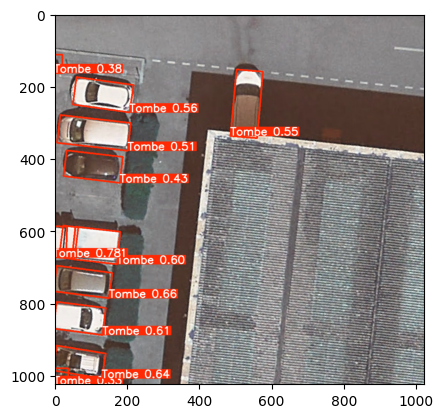

In [81]:
plt.imshow(pred[0].plot())